In [94]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import warnings

In [95]:
df = pd.read_csv('stud.csv')

In [96]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [97]:
# preparing X and y variables
X = df.drop(columns=['math_score'], axis=1)
y = df['math_score']

In [98]:
num_features = X.select_dtypes(exclude=['object']).columns
cat_features = X.select_dtypes(include=['object']).columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', oh_transformer, cat_features),
        ('StandardScaler', num_transformer, num_features)
    ]
)

In [99]:
X = preprocessor.fit_transform(X)

In [106]:
X.shape

(1000, 19)

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [110]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [117]:
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'K-Neighbors Regressor': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'XGBRegressor': XGBRegressor(),
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    print('='*35)
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Test set')
    print('- Root Mean Squared Error: {:.4f}'.format(model_test_rmse))
    print('- Mean Squared Error: {:.4f}'.format(model_test_mae))
    print('- R2 Score: {:.4f}'.format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model performance for Test set
- Root Mean Squared Error: 5.5854
- Mean Squared Error: 4.3975
- R2 Score: 0.8623


Lasso
Model performance for Test set
- Root Mean Squared Error: 6.7021
- Mean Squared Error: 5.3566
- R2 Score: 0.8018


Ridge
Model performance for Test set
- Root Mean Squared Error: 5.5674
- Mean Squared Error: 4.3880
- R2 Score: 0.8632


K-Neighbors Regressor
Model performance for Test set
- Root Mean Squared Error: 6.8965
- Mean Squared Error: 5.5610
- R2 Score: 0.7901


Decision Tree
Model performance for Test set
- Root Mean Squared Error: 7.6903
- Mean Squared Error: 6.0900
- R2 Score: 0.7390


Random Forest Regressor
Model performance for Test set
- Root Mean Squared Error: 5.6850
- Mean Squared Error: 4.5983
- R2 Score: 0.8574


XGBRegressor
Model performance for Test set
- Root Mean Squared Error: 6.4130
- Mean Squared Error: 5.0565
- R2 Score: 0.8185




In [123]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score'])

,Model Name,R2_Score
0,Linear Regression,0.862327
1,Lasso,0.801773
2,Ridge,0.863213
3,K-Neighbors Regressor,0.790108
4,Decision Tree,0.739013
5,Random Forest Regressor,0.857373
6,XGBRegressor,0.818506


In [126]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print('Accuracy of the model is %.2f' %score)

Accuracy of the model is 86.23


Text(0, 0.5, 'Predicted')

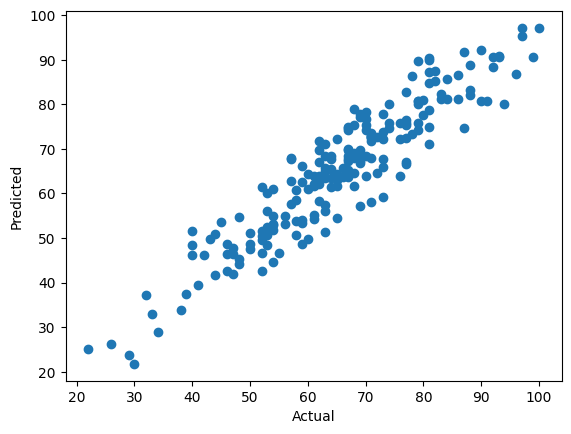

In [128]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math_score'>

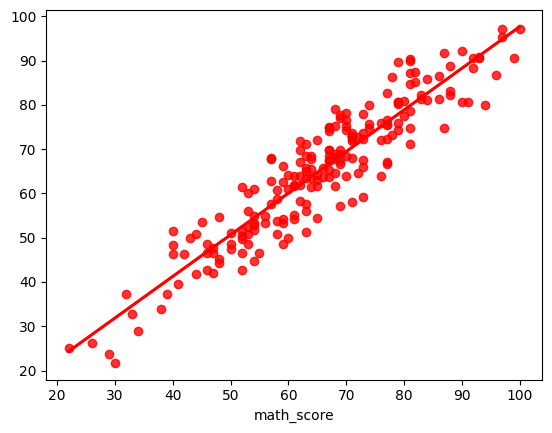

In [130]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')

In [133]:
pred_df = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred, 'Difference': y_test-y_pred})
pred_df

,Actual value,Predicted value,Difference
993,62,62.000,0.000
859,87,74.750,12.250
298,40,48.375,-8.375
553,77,66.625,10.375
672,69,69.750,-0.750
...,...,...,...
679,63,63.500,-0.500
722,74,75.750,-1.750
215,84,81.125,2.875
653,65,61.625,3.375
